In [1]:
# asking some questions first

# which campaign performed the best, which did the worst
# which sales channel performs the best, which does the worst
# what kinds of products are doing well?
# areas of improvement?

In [2]:
# read the csv file on google drive into a dataframe

import pandas as pd
import numpy as np

# set google drive file access to 'anyone with a link first'

url='https://drive.google.com/file/d/14z4MTjpeWhu9mN249GBvJ9EpFTQaweyC/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id='+file_id
df=pd.read_csv(dwn_url, parse_dates=['Dt_Customer'])

In [3]:
# Data Cleaning

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
# there are some missing values in the Income col, we will deal with it later 

# add column 'age' (more useful than 'Year_Birth'), find the current year and calculate difference

from datetime import datetime, timedelta

df['Age']=datetime.now().year - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,Spain,52
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,Canada,61
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,USA,64
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,Australia,55
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,Spain,33


In [8]:
# add column 'Tenure' (more useful than 'Dt_Customer', in years)

df['now']=datetime.now()
df['Tenure']=df['now']-df['Dt_Customer']
df['Tenure']=df['Tenure']/np.timedelta64(1, 'Y')
df['Tenure']

0       8.146278
1       8.149016
2       8.239367
3       8.244843
4       8.335194
          ...   
2235    9.422143
2236    9.542611
2237    9.679506
2238    9.690458
2239    9.934131
Name: Tenure, Length: 2240, dtype: float64

In [9]:
df.describe(include='all')

/var/folders/w6/ddhvjk452zd_0_6knb38bp_m0000gn/T/ipykernel_90135/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,now,Tenure
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,1,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,NaN,2022-08-08 08:48:23.724328,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,2240,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-30 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-08 08:48:23.724328,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-29 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-08 08:48:23.724328,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN,53.194196,NaN,9.078760
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN,11.984069,NaN,0.553393
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,26.000000,NaN,8.110685
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,45.000000,NaN,8.605562


In [10]:
pd.unique(df['Education'])

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [11]:
pd.unique(df['Marital_Status'])

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [12]:
pd.unique(df['Country'])

array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [13]:
pd.unique(df['AcceptedCmp1'])

array([0, 1])

In [14]:
pd.unique(df['AcceptedCmp2'])

array([0, 1])

In [15]:
pd.unique(df['AcceptedCmp3'])

array([0, 1])

In [16]:
pd.unique(df['AcceptedCmp4'])

array([0, 1])

In [17]:
pd.unique(df['AcceptedCmp5'])

array([0, 1])

In [18]:
# here's the list of what we need to clean - 
# 'Education': group 'Graduation' and '2n Cycle' in the same category as 'Master'
# 'Marital_Status': replace 'Alone' with 'Single'; replace 'Married' and 'Together' with 'Coupled'; replace 'YOLO' and 'Absurd' with 'Other'
# ' Income ': get rid of the spaces in the col name, and deal with missing values

In [19]:
# 'Graduation' and '2n Cycle' both mean 'Master'

df['Education_Cleaned']=df['Education']

In [20]:
# cleaning the 'Education' col (not touching raw data)

df['Education_Cleaned']=df['Education']
df['Education_Cleaned']=df['Education_Cleaned'].replace(['Graduation', '2n Cycle'], 'Master')

assert pd.unique(df['Education_Cleaned']).all() in ['Basic', 'Master', 'PhD']

In [21]:
# cleaning the 'Marital_Status' col (not touching raw data)

df['Marital_Status_Cleaned']=df['Marital_Status']
pd.unique(df['Marital_Status_Cleaned'])

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [22]:
df['Marital_Status_Cleaned']=df['Marital_Status_Cleaned'].replace(['Alone'], 'Single')
df['Marital_Status_Cleaned']=df['Marital_Status_Cleaned'].replace(['Married', 'Together'], 'Coupled')
df['Marital_Status_Cleaned']=df['Marital_Status_Cleaned'].replace(['YOLO', 'Absurd'], 'Other')

assert pd.unique(df['Marital_Status_Cleaned']).all() in ['Divorced', 'Single', 'Coupled', 'Widow', 'Other'] 

In [23]:
# cleaning the ' Income ' col (not touching raw data)
# first, start a new, identical col without spaces in the col name

df['Income']=df[' Income ']

assert df['Income'].equals(df[' Income '])

In [24]:
# next we deal with the missing values

import sys
!conda install --yes --prefix {sys.prefix} missingno

import missingno as msno

Solving environment: done

# All requested packages already installed.



<AxesSubplot:>

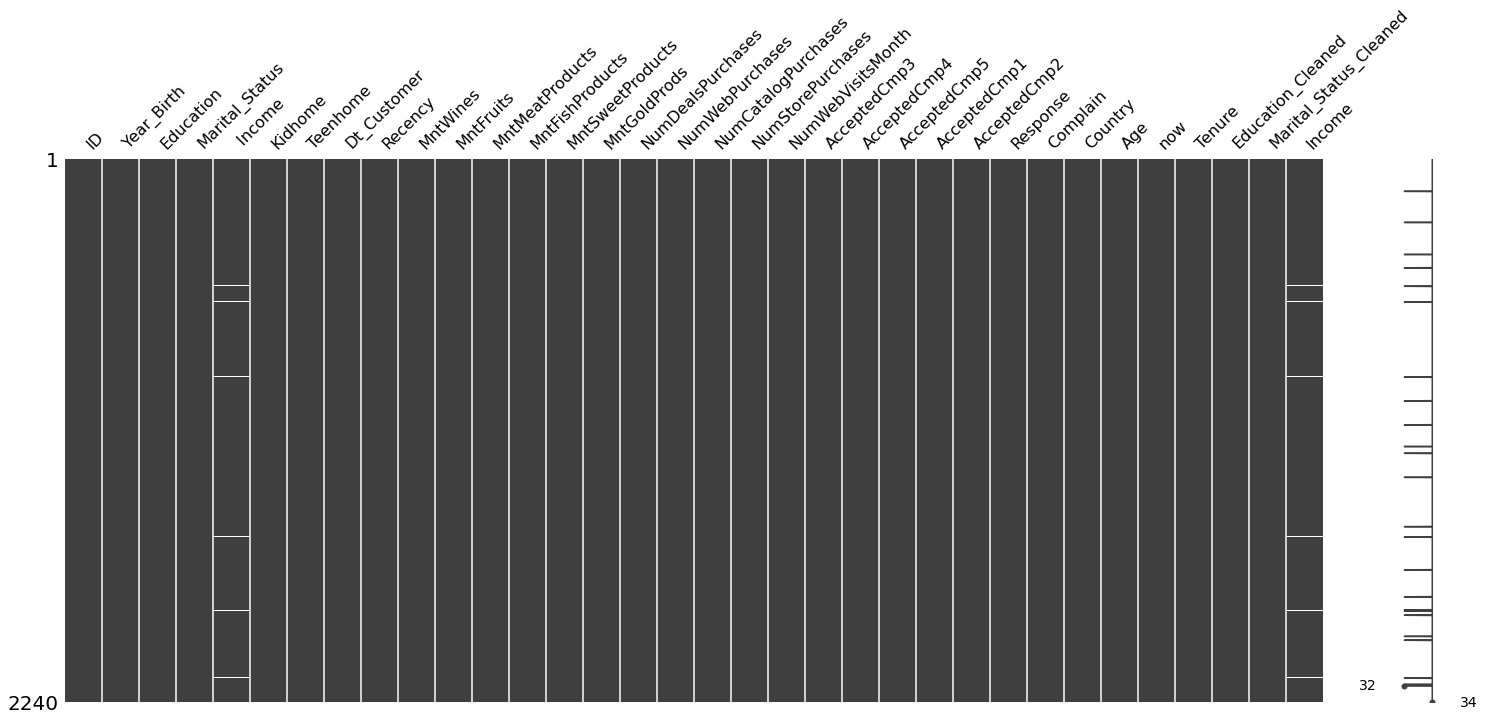

In [25]:
%matplotlib inline
msno.matrix(df)

<AxesSubplot:>

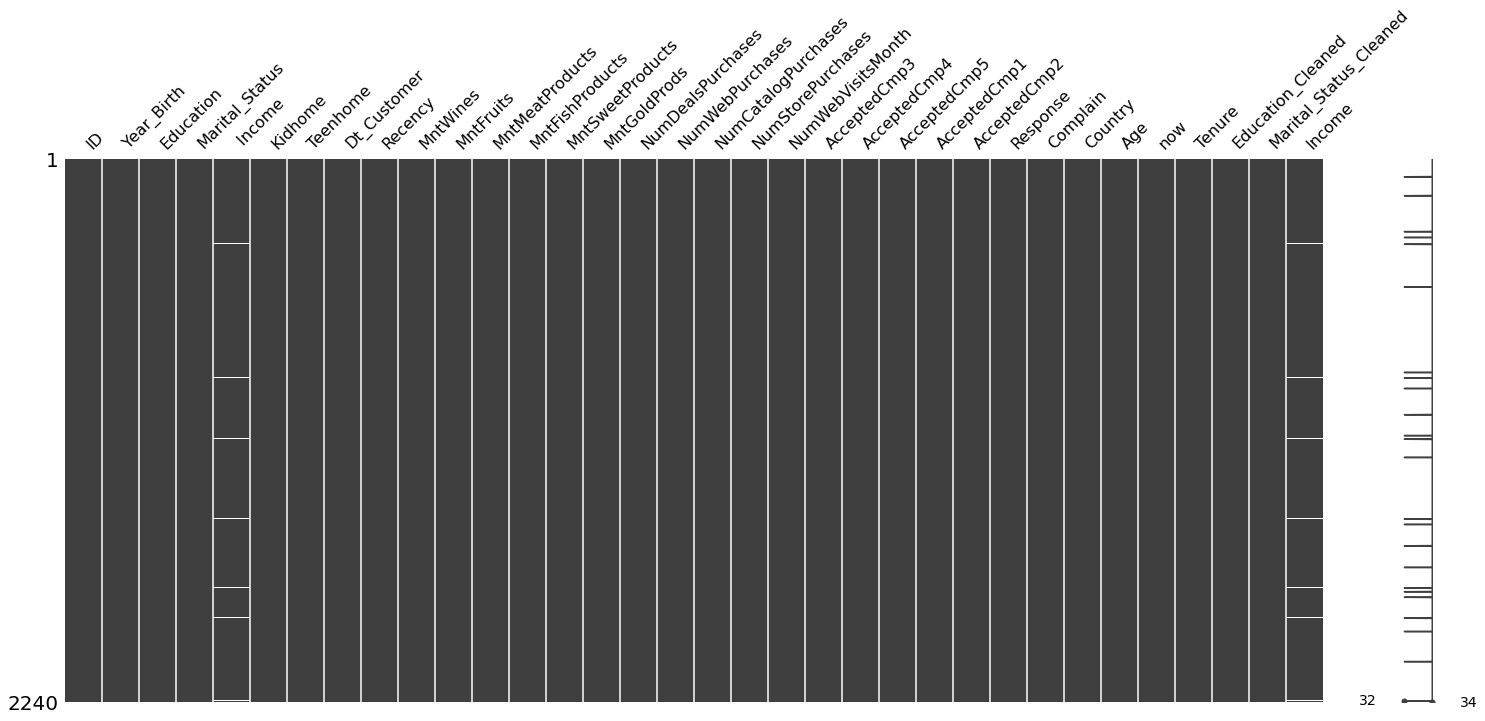

In [26]:
# wondering if missing value has anything to do with other variables like 'Age'

df_sorted=df.sort_values(by='Age')
msno.matrix(df_sorted)

In [27]:
# no correlation it seems, we will assume that they are missing at random and fill the values with the mean

missing_value=df['Income'].mean()
df['Income'].fillna(value=missing_value, inplace=True)

In [28]:
df['Income'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [29]:
# now we can have a cleaned df!

df_cleaned = df.drop(columns=['Marital_Status', ' Income ', 'Education', 'Year_Birth', 'Dt_Customer'])
df_cleaned.columns

Index(['ID', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'now',
       'Tenure', 'Education_Cleaned', 'Marital_Status_Cleaned', 'Income'],
      dtype='object')

In [30]:
# data all cleaned and wrangled! Moving on to Univariate Exploration

In [31]:
# Univariate Exploration - Categorical Variables

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Education_Cleaned', ylabel='count'>

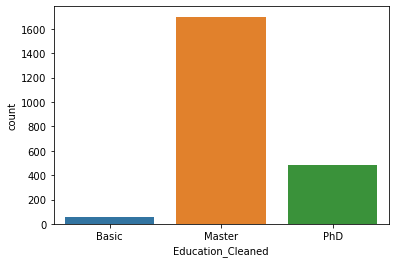

In [33]:
Education_Order = ['Basic', 'Master', 'PhD']
sns.countplot(x='Education_Cleaned', data=df_cleaned, order=Education_Order)

<AxesSubplot:xlabel='Marital_Status_Cleaned', ylabel='count'>

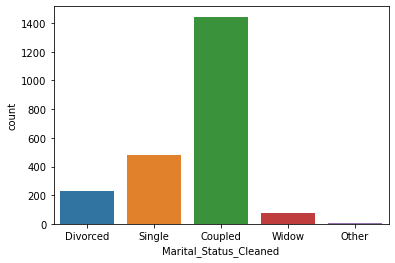

In [34]:
sns.countplot(x='Marital_Status_Cleaned', data=df_cleaned)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Spain'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'USA'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Saudi Arabia'),
  Text(7, 0, 'Mexico')])

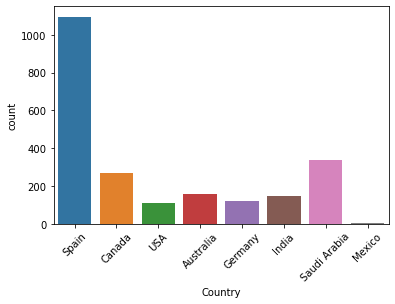

In [35]:
sns.countplot(x='Country', data=df_cleaned)
plt.xticks(rotation=45)

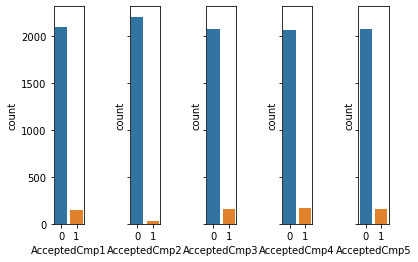

In [36]:
fig, axes = plt.subplots(1, 5, sharey=True)

sns.countplot(data=df_cleaned, x='AcceptedCmp1', ax=axes[0])
sns.countplot(data=df_cleaned, x='AcceptedCmp2', ax=axes[1])
sns.countplot(data=df_cleaned, x='AcceptedCmp3', ax=axes[2])
sns.countplot(data=df_cleaned, x='AcceptedCmp4', ax=axes[3])
sns.countplot(data=df_cleaned, x='AcceptedCmp5', ax=axes[4])

fig.subplots_adjust(wspace=1.5)

<AxesSubplot:xlabel='Response', ylabel='count'>

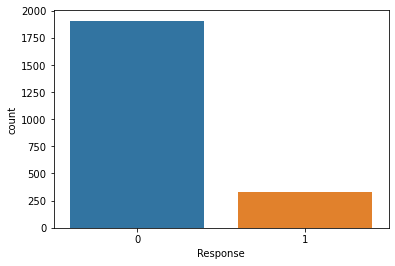

In [37]:
sns.countplot(data=df_cleaned, x='Response')

<AxesSubplot:xlabel='Complain', ylabel='count'>

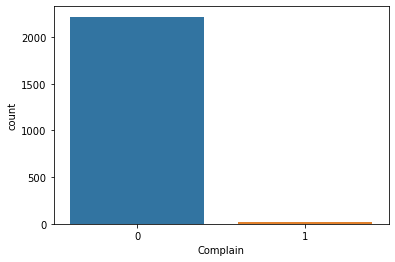

In [38]:
sns.countplot(data=df_cleaned, x='Complain')

In [39]:
# Univariate Exploration - Numerical Variables

<AxesSubplot:xlabel='Age', ylabel='Count'>

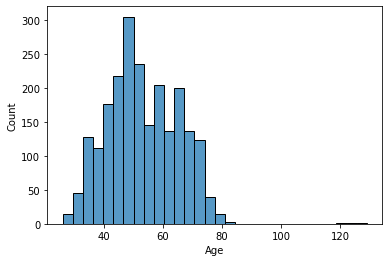

In [40]:
sns.histplot(data=df_cleaned, x='Age', bins=30)

<AxesSubplot:xlabel='Income'>

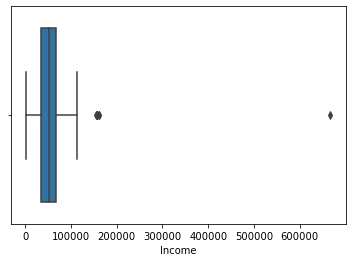

In [41]:
sns.boxplot(data=df_cleaned, x='Income')

<AxesSubplot:xlabel='Kidhome', ylabel='count'>

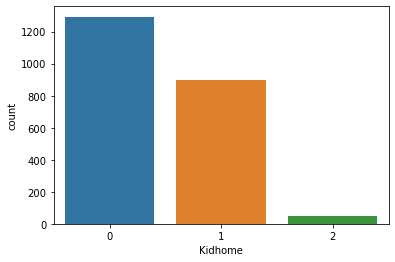

In [42]:
sns.countplot(data=df_cleaned, x='Kidhome')

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

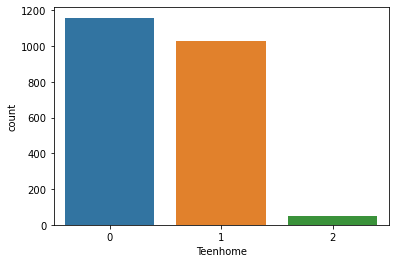

In [43]:
sns.countplot(data=df_cleaned, x='Teenhome')

<AxesSubplot:xlabel='Recency', ylabel='Count'>

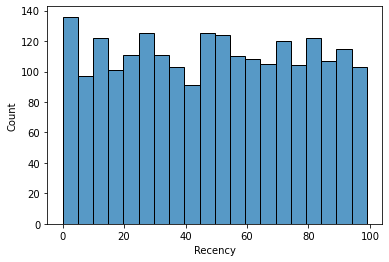

In [44]:
sns.histplot(data=df_cleaned, x='Recency', bins=20)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'MntWines'),
  Text(1, 0, 'MntFruits'),
  Text(2, 0, 'MntMeatProducts'),
  Text(3, 0, 'MntFishProducts'),
  Text(4, 0, 'MntSweetProducts'),
  Text(5, 0, 'MntGoldProds')])

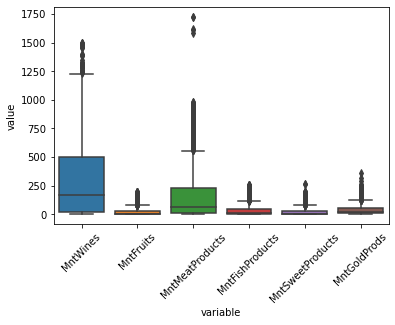

In [45]:
# visualize all the 'amounts' columns together with box plots

df_mnt=df_cleaned[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',]]
df_mnt_melted=pd.melt(df_mnt)

sns.boxplot(x='variable', y='value', data=df_mnt_melted)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'NumDealsPurchases'),
  Text(1, 0, 'NumWebPurchases'),
  Text(2, 0, 'NumCatalogPurchases'),
  Text(3, 0, 'NumStorePurchases')])

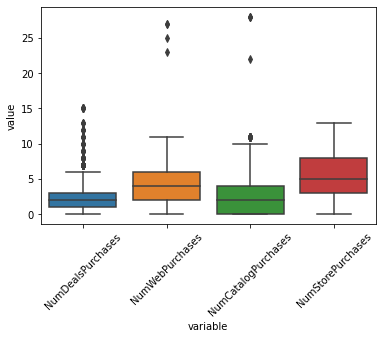

In [46]:
# visualize all the 'number of purchases' columns together with box plots

df_num=df_cleaned[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
df_num_melted=pd.melt(df_num)

sns.boxplot(x='variable', y='value', data=df_num_melted)
plt.xticks(rotation=45)

<AxesSubplot:ylabel='NumWebVisitsMonth'>

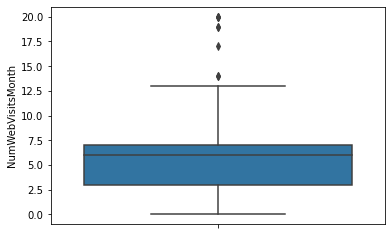

In [47]:
sns.boxplot(data=df_cleaned, y='NumWebVisitsMonth')


In [48]:
# findings from univariate exploration:
# the profile of a typical customer - Spanish with Master's degree, coupled up, in their 40s-70s, earns 35-68k per year, has no or one child
# campaign #2 did the worst (least accepted)
# customers spent the most on wine, followed by meat
# store seems to be customers' favourite channel, followed by web
# more than 10% of customers accepted offer from the last campaign
# customers seem to be overall satisfied since there's minimal complaints

In [49]:
# Bivariate Exploration

<AxesSubplot:>

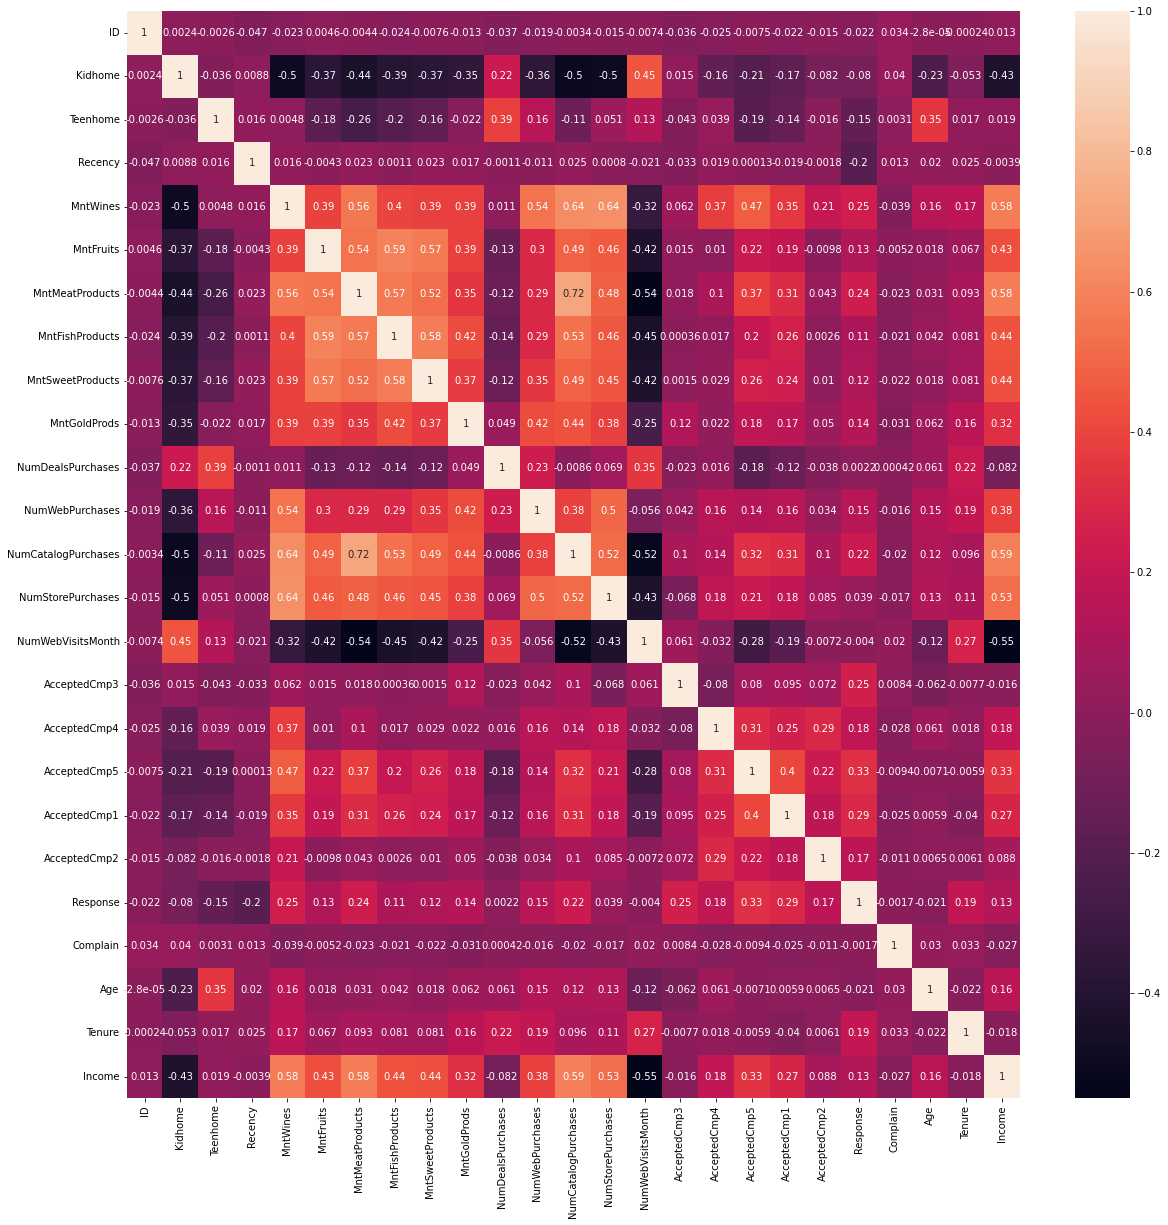

In [50]:
# first, correlation matrix and a heatmap to visualize it so I know which variables to look into next

corr_mat=df_cleaned.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True)


In [51]:
# I want to single out the strongest correlations

c=corr_mat.abs()
s=c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so=so[so!=1] #excluse the 1s
so

NumCatalogPurchases  MntMeatProducts        0.723827
MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
MntWines             NumStorePurchases      0.642100
                     NumCatalogPurchases    0.635226
                                              ...   
ID                   Tenure                 0.000240
AcceptedCmp5         Recency                0.000129
Recency              AcceptedCmp5           0.000129
Age                  ID                     0.000028
ID                   Age                    0.000028
Length: 600, dtype: float64

In [52]:
# select moderate to strong correlations (>=0.5, anything above 0.7 is considered strong, above 0.5 is moderate)

so_corr=so[so>=0.5].drop_duplicates()
so_corr

NumCatalogPurchases  MntMeatProducts        0.723827
NumStorePurchases    MntWines               0.642100
MntWines             NumCatalogPurchases    0.635226
MntFishProducts      MntFruits              0.594804
Income               NumCatalogPurchases    0.586725
MntSweetProducts     MntFishProducts        0.579870
Income               MntMeatProducts        0.577802
MntWines             Income                 0.576789
MntFishProducts      MntMeatProducts        0.568402
MntFruits            MntSweetProducts       0.567164
MntWines             MntMeatProducts        0.562667
NumWebVisitsMonth    Income                 0.549824
MntMeatProducts      MntFruits              0.543105
NumWebPurchases      MntWines               0.542265
NumWebVisitsMonth    MntMeatProducts        0.539470
NumCatalogPurchases  MntFishProducts        0.534478
NumStorePurchases    Income                 0.526489
MntMeatProducts      MntSweetProducts       0.523846
NumWebVisitsMonth    NumCatalogPurchases    0.

<AxesSubplot:xlabel='MntFishProducts', ylabel='NumCatalogPurchases'>

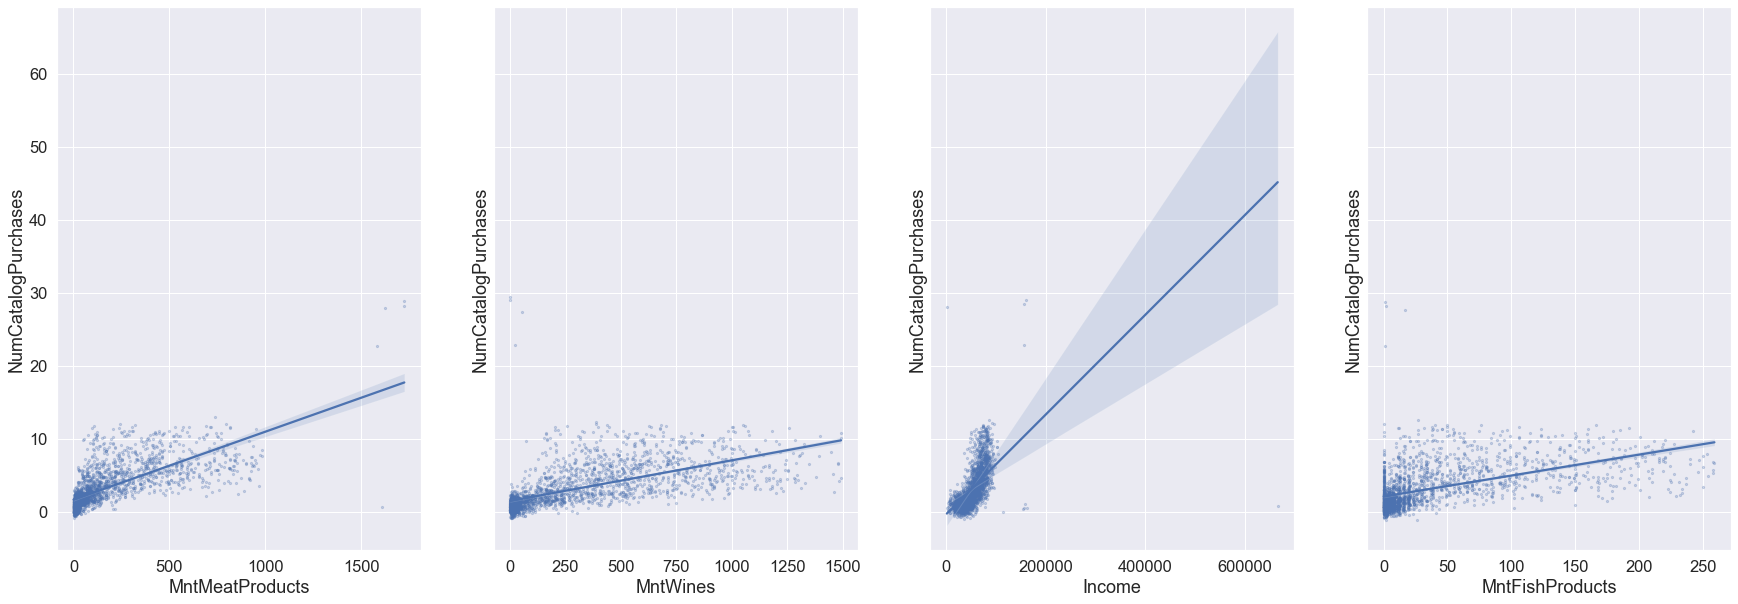

In [53]:
# plot NumCatalogPurchases against: MntMeatProducts, MntWines, Income, MntFishProducts

def jitter(values, j):
    return values+np.random.normal(j, 0.5, values.shape)

sns.set(font_scale = 1.5)
fig, ax=plt.subplots(1,4,figsize=(30,10), sharey=True)

sns.regplot(y=jitter(df_cleaned.NumCatalogPurchases, 0.5), x=df_cleaned.MntMeatProducts, scatter_kws={'alpha':0.25, 's':5}, ax=ax[0])
sns.regplot(y=jitter(df_cleaned.NumCatalogPurchases, 0.5), x=df_cleaned.MntWines, scatter_kws={'alpha':0.25, 's':5}, ax=ax[1])
sns.regplot(y=jitter(df_cleaned.NumCatalogPurchases, 0.5), x=df_cleaned.Income, scatter_kws={'alpha':0.25, 's':5}, ax=ax[2])
sns.regplot(y=jitter(df_cleaned.NumCatalogPurchases, 0.5), x=df_cleaned.MntFishProducts, scatter_kws={'alpha':0.25, 's':5}, ax=ax[3])


<AxesSubplot:xlabel='Income', ylabel='NumStorePurchases'>

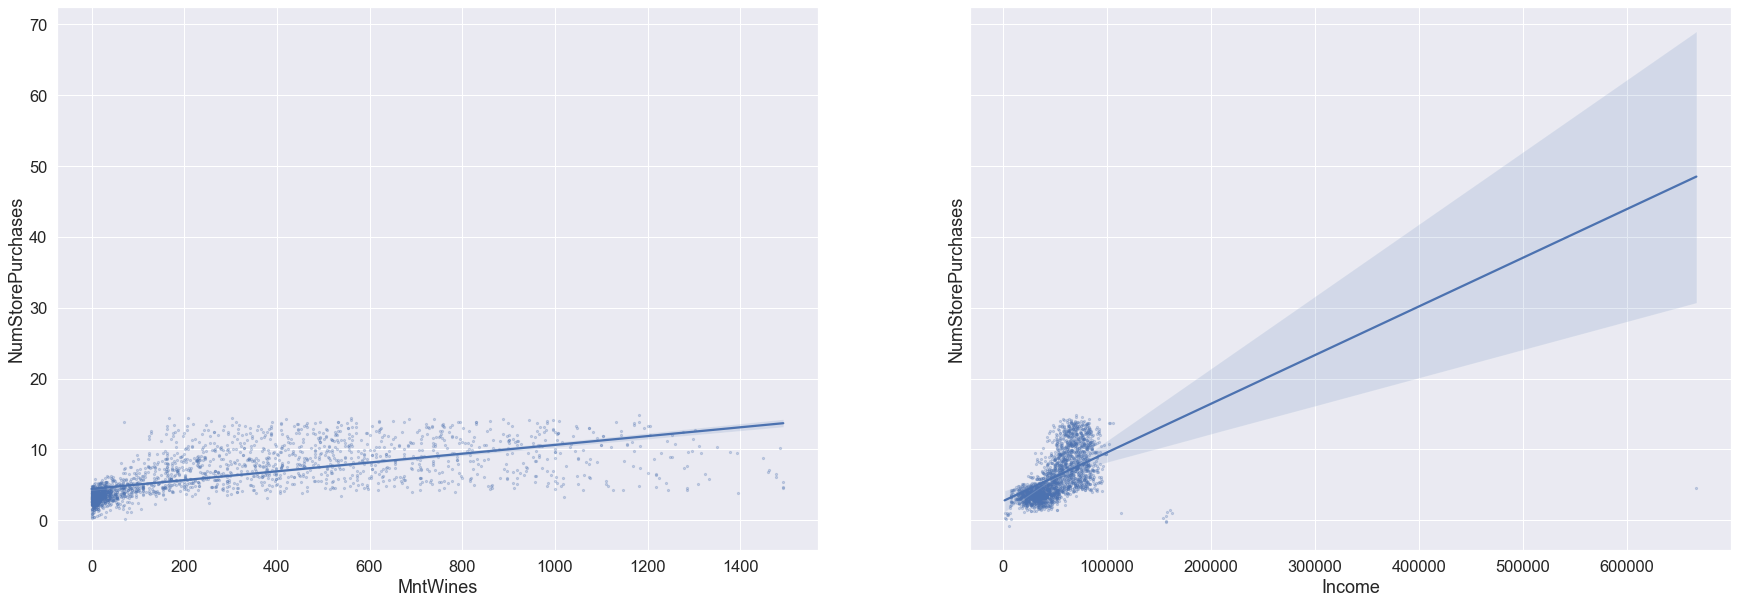

In [54]:
# plot NumStorePurchases against: MntWines, Income

fig, ax=plt.subplots(1,2, figsize=(30,10), sharey=True)

sns.regplot(y=jitter(df_cleaned.NumStorePurchases, 0.5), x=df_cleaned.MntWines, scatter_kws={'alpha':0.25, 's':5}, ax=ax[0])
sns.regplot(y=jitter(df_cleaned.NumStorePurchases, 0.5), x=df_cleaned.Income, scatter_kws={'alpha':0.25, 's':5}, ax=ax[1])

<AxesSubplot:xlabel='MntWines', ylabel='NumWebPurchases'>

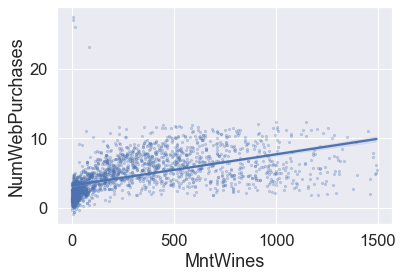

In [55]:
# plot NumWebPurchases against: MntWines

sns.regplot(y=jitter(df_cleaned.NumWebPurchases, 0.5), x=df_cleaned.MntWines, scatter_kws={'alpha':0.25, 's':5})

<AxesSubplot:xlabel='NumWebPurchases', ylabel='NumWebVisitsMonth'>

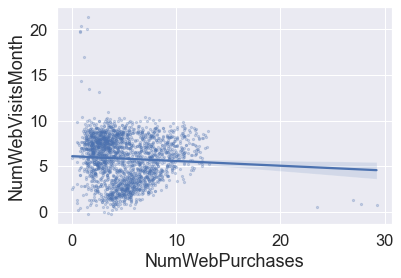

In [56]:
# plot NumWebVisitsMonth against NumWebPurchases

sns.regplot(y=jitter(df_cleaned.NumWebVisitsMonth, 0.5), x=jitter(df_cleaned.NumWebPurchases, 1), scatter_kws={'alpha':0.25, 's':5})

In [57]:
# there seems to be a weak and negative correlation between number of web visits and number of web purchases
# which seems a bit strange...maybe our website isn't working well?

<AxesSubplot:xlabel='Income', ylabel='MntWines'>

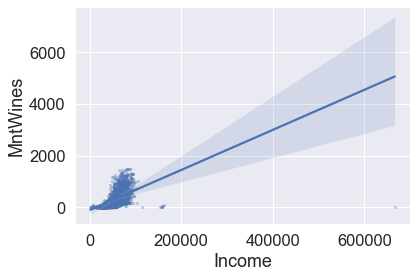

In [58]:
# plot MntWines against Income

sns.regplot(y=jitter(df_cleaned.MntWines, 0.5), x=jitter(df_cleaned.Income, 1), scatter_kws={'alpha':0.25, 's':5})

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='MntMeatProducts'>

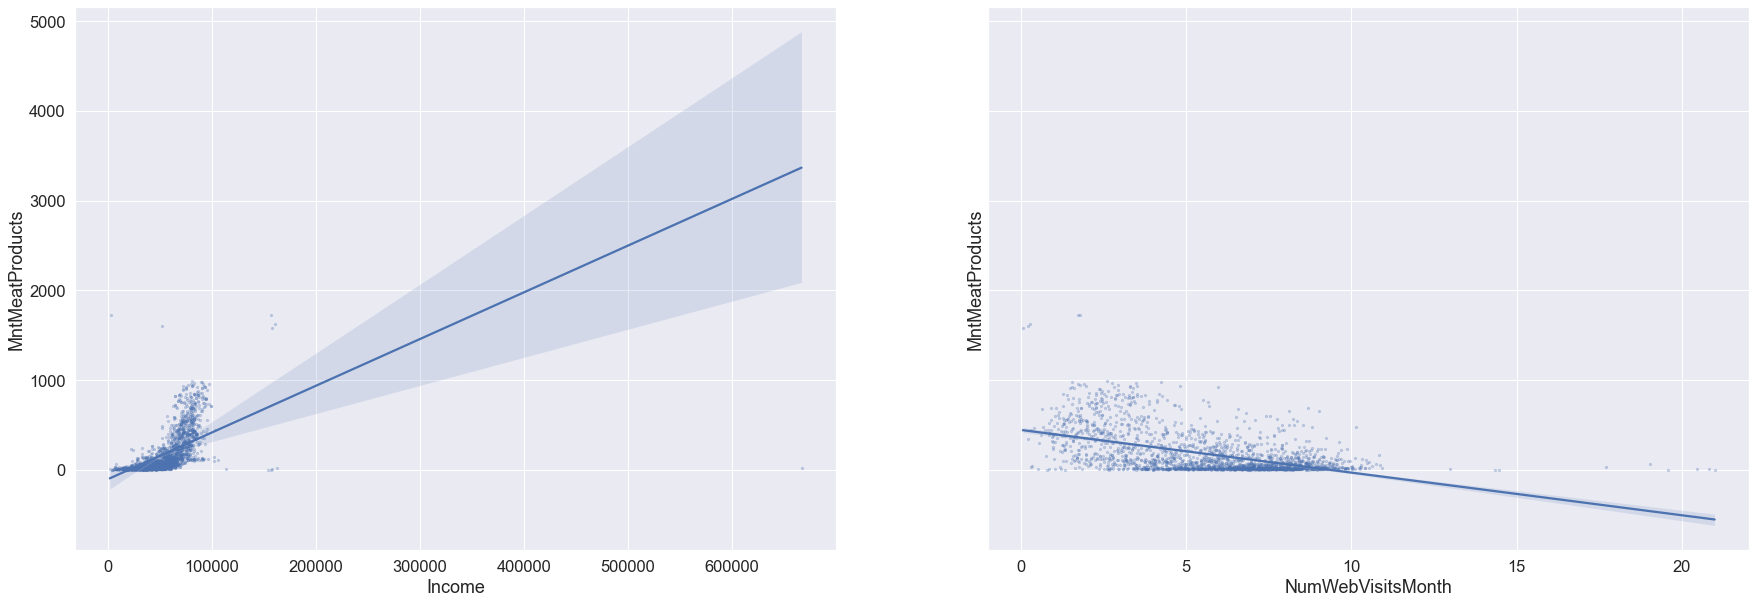

In [59]:
# plot MntMeatProducts against: Income and NumWebVisitsMonth

fig, ax=plt.subplots(1,2, figsize=(30,10), sharey=True)

sns.regplot(y=jitter(df_cleaned.MntMeatProducts, 0.5), x=df_cleaned.Income, scatter_kws={'alpha':0.25, 's':5}, ax=ax[0])
sns.regplot(y=jitter(df_cleaned.MntMeatProducts, 0.5), x=jitter(df_cleaned.NumWebVisitsMonth, 0.5), scatter_kws={'alpha':0.25, 's':5}, ax=ax[1])

<AxesSubplot:>

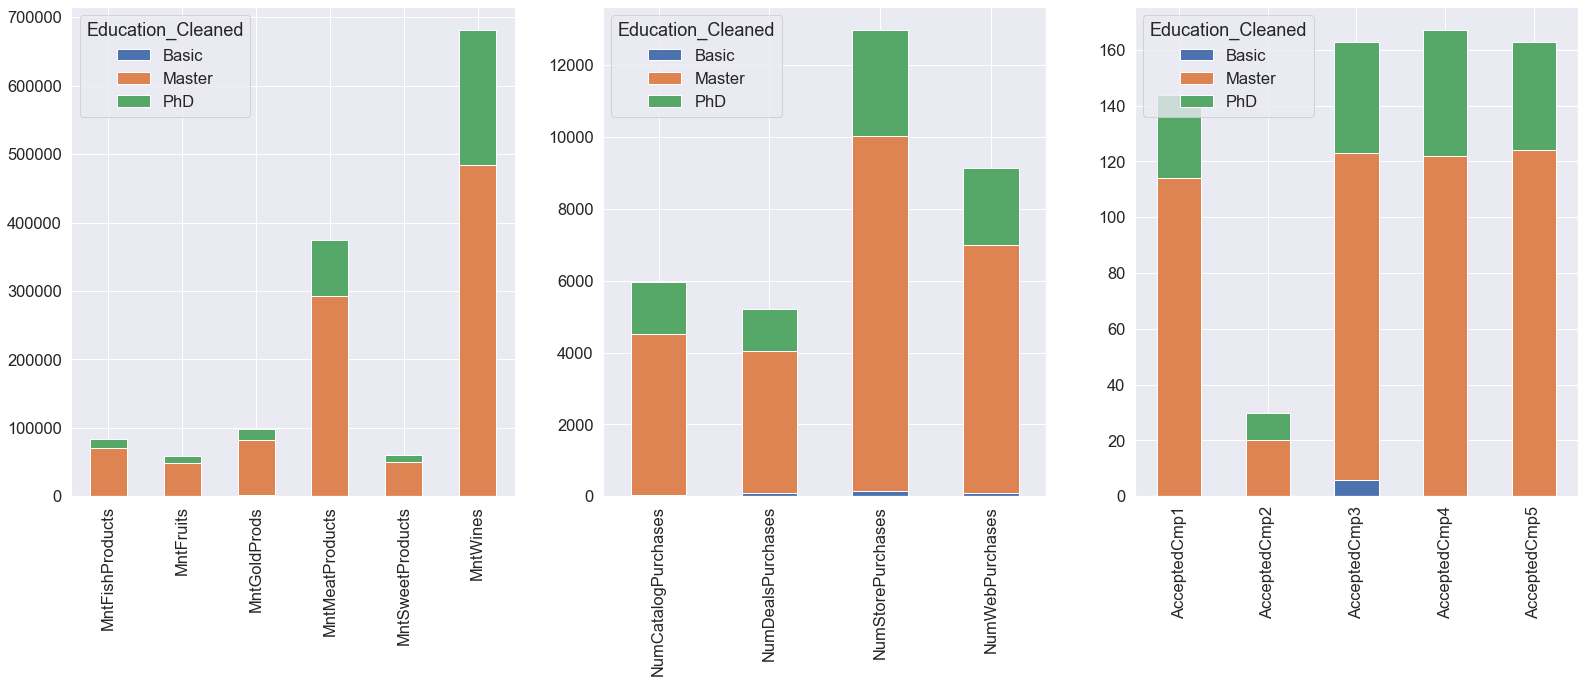

In [60]:
# explore the relationship between Education and amounts spent on different kinds of products, sales channels and their favourite campaigns

df_mnt_edu_pivot=pd.pivot_table(data=df_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Education_Cleaned', aggfunc=np.sum)
df_num_edu_pivot=pd.pivot_table(data=df_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Education_Cleaned', aggfunc=np.sum)
df_cmp_edu_pivot=pd.pivot_table(data=df_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Education_Cleaned', aggfunc=np.sum)

fig, ax = plt.subplots(1,3,figsize=(27,9))

df_mnt_edu_pivot.plot(kind='bar', stacked=True, ax=ax[0])
df_num_edu_pivot.plot(kind='bar', stacked=True, ax=ax[1])
df_cmp_edu_pivot.plot(kind='bar', stacked=True, ax=ax[2])

<AxesSubplot:>

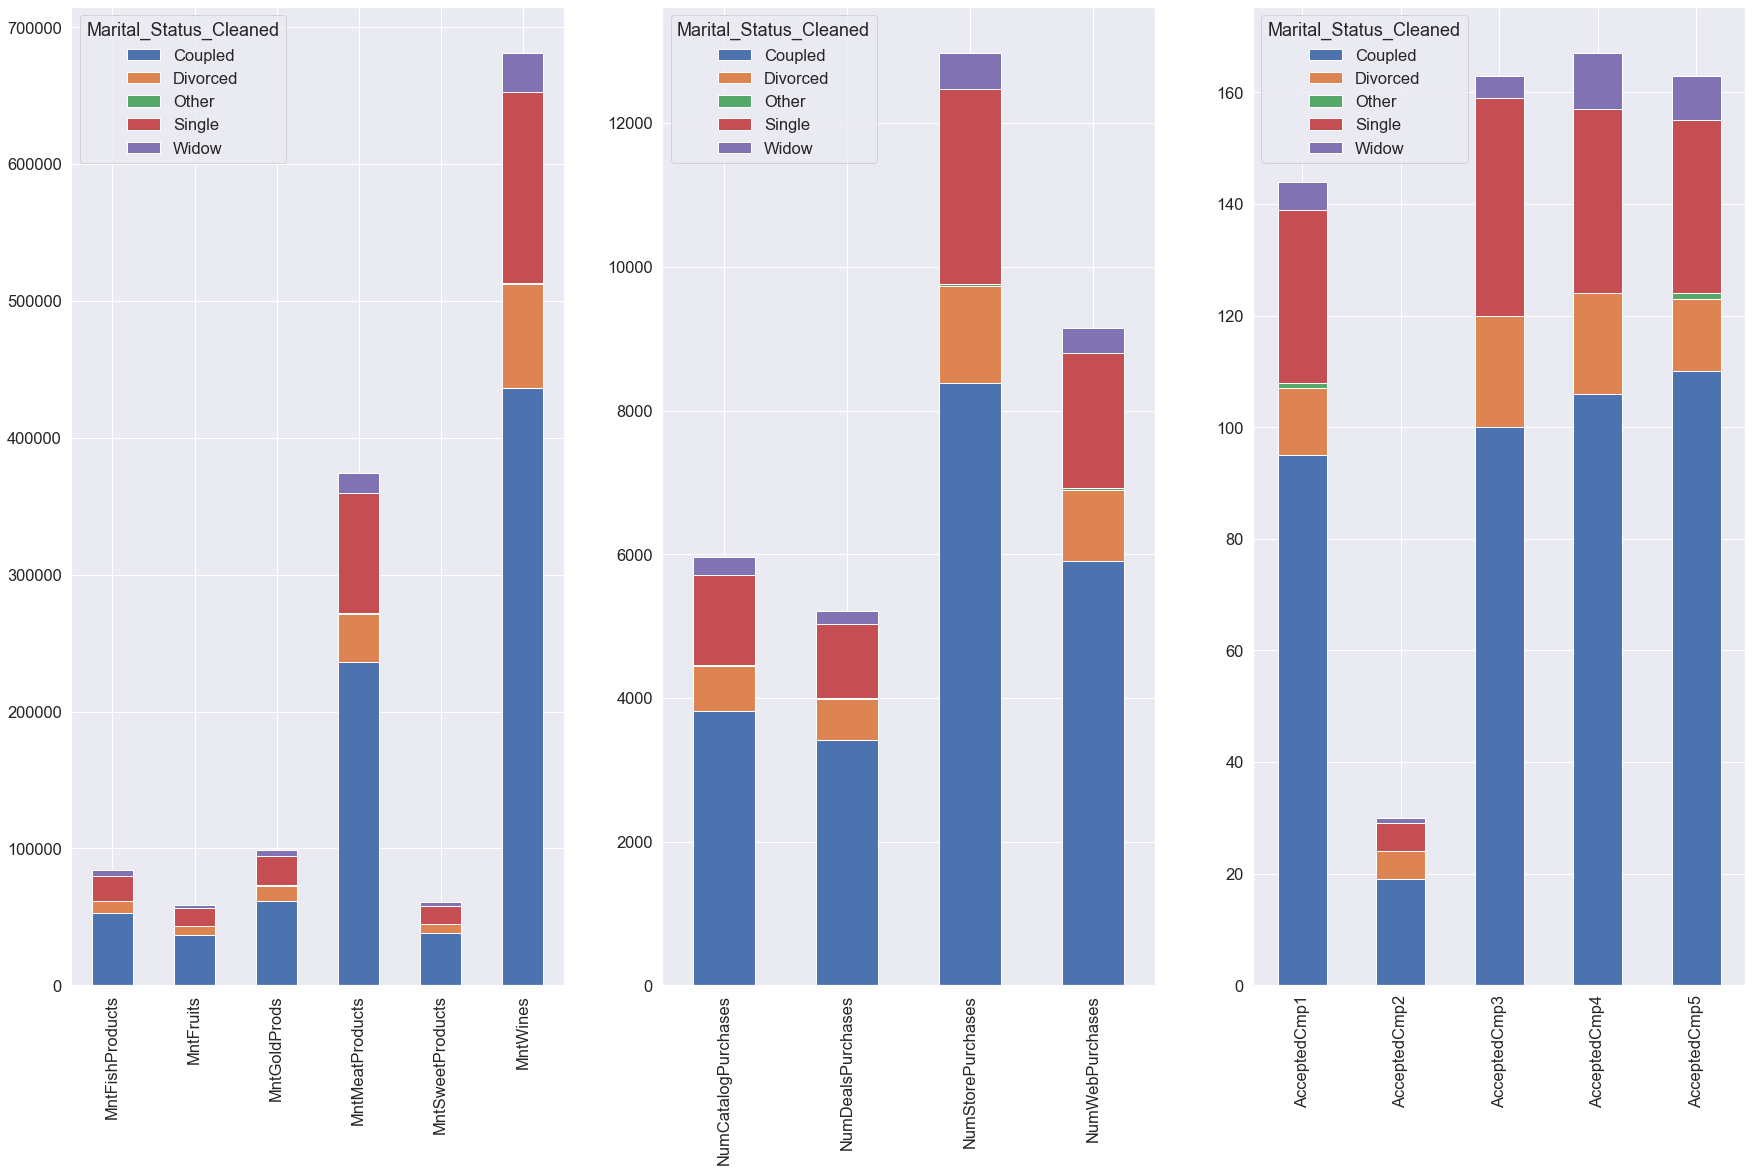

In [61]:
# explore the relationship between Marital Status and amounts spent on different kinds of products, sales channels and their favourite campaigns

df_mnt_ms_pivot=pd.pivot_table(data=df_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Marital_Status_Cleaned', aggfunc=np.sum)
df_num_ms_pivot=pd.pivot_table(data=df_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Marital_Status_Cleaned', aggfunc=np.sum)
df_cmp_ms_pivot=pd.pivot_table(data=df_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Marital_Status_Cleaned', aggfunc=np.sum)

fig, ax = plt.subplots(1,3,figsize=(30,18))

df_mnt_ms_pivot.plot(kind='bar', stacked=True, ax=ax[0])
df_num_ms_pivot.plot(kind='bar', stacked=True, ax=ax[1])
df_cmp_ms_pivot.plot(kind='bar', stacked=True, ax=ax[2])

<AxesSubplot:>

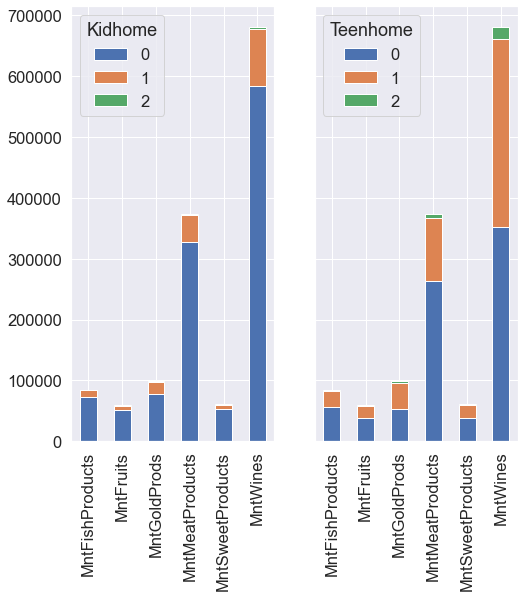

In [62]:
# does number of kids home have anything to do with the kinds of products people buy?

df_mnt_kh_pivot=pd.pivot_table(data=df_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Kidhome', aggfunc=np.sum)
df_mnt_th_pivot=pd.pivot_table(data=df_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Teenhome', aggfunc=np.sum)

fig, ax = plt.subplots(1,2,figsize=(8,8),sharey=True)

df_mnt_kh_pivot.plot(kind='bar', stacked=True, ax=ax[0])
df_mnt_th_pivot.plot(kind='bar', stacked=True, ax=ax[1])

<AxesSubplot:>

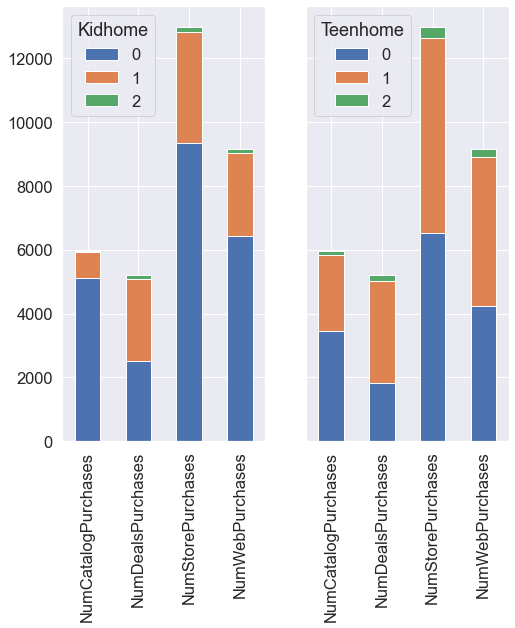

In [63]:
# explore the relationships between # of kids/teens home and sales channels

df_num_kh_pivot=pd.pivot_table(data=df_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Kidhome', aggfunc=np.sum)
df_num_th_pivot=pd.pivot_table(data=df_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Teenhome', aggfunc=np.sum)

fig, ax = plt.subplots(1,2,figsize=(8,8), sharey=True)

df_num_kh_pivot.plot(kind='bar', stacked=True, ax=ax[0])
df_num_th_pivot.plot(kind='bar', stacked=True, ax=ax[1])

<AxesSubplot:>

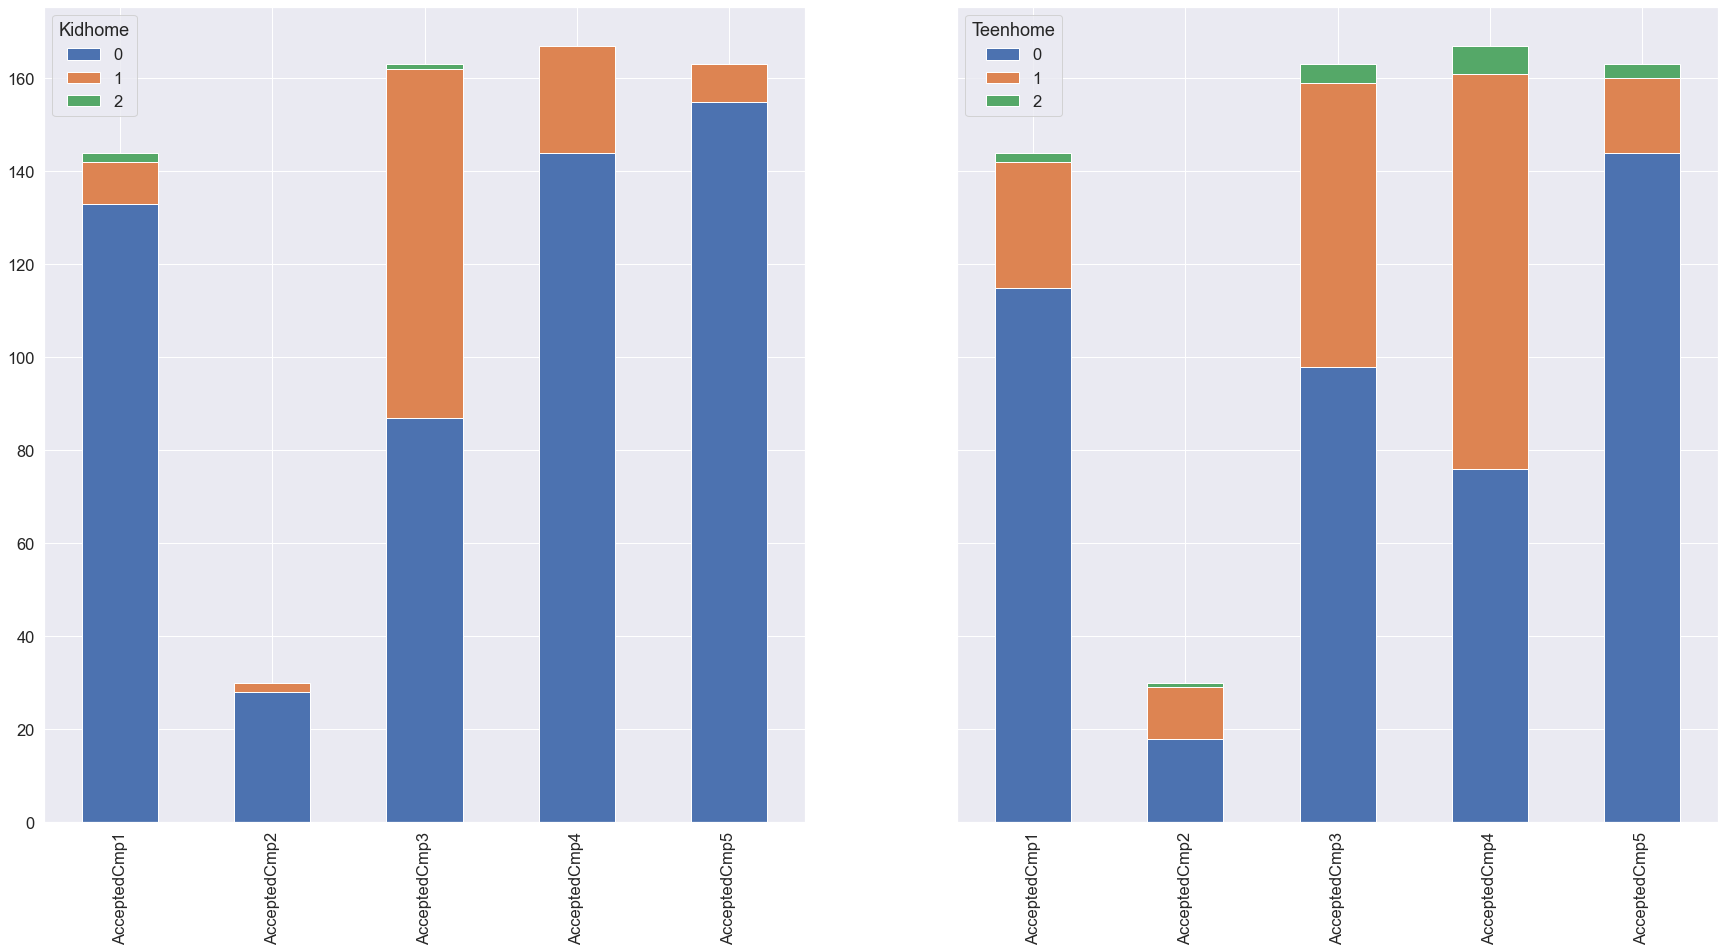

In [64]:
# explore the relationships between # of kids/teens home and campaign successes

df_cmp_kh_pivot=pd.pivot_table(data=df_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Kidhome', aggfunc=np.sum)
df_cmp_th_pivot=pd.pivot_table(data=df_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Teenhome', aggfunc=np.sum)

fig, ax = plt.subplots(1,2,figsize=(30,15), sharey=True)

df_cmp_kh_pivot.plot(kind='bar', stacked=True, ax=ax[0])
df_cmp_th_pivot.plot(kind='bar', stacked=True, ax=ax[1])

<AxesSubplot:>

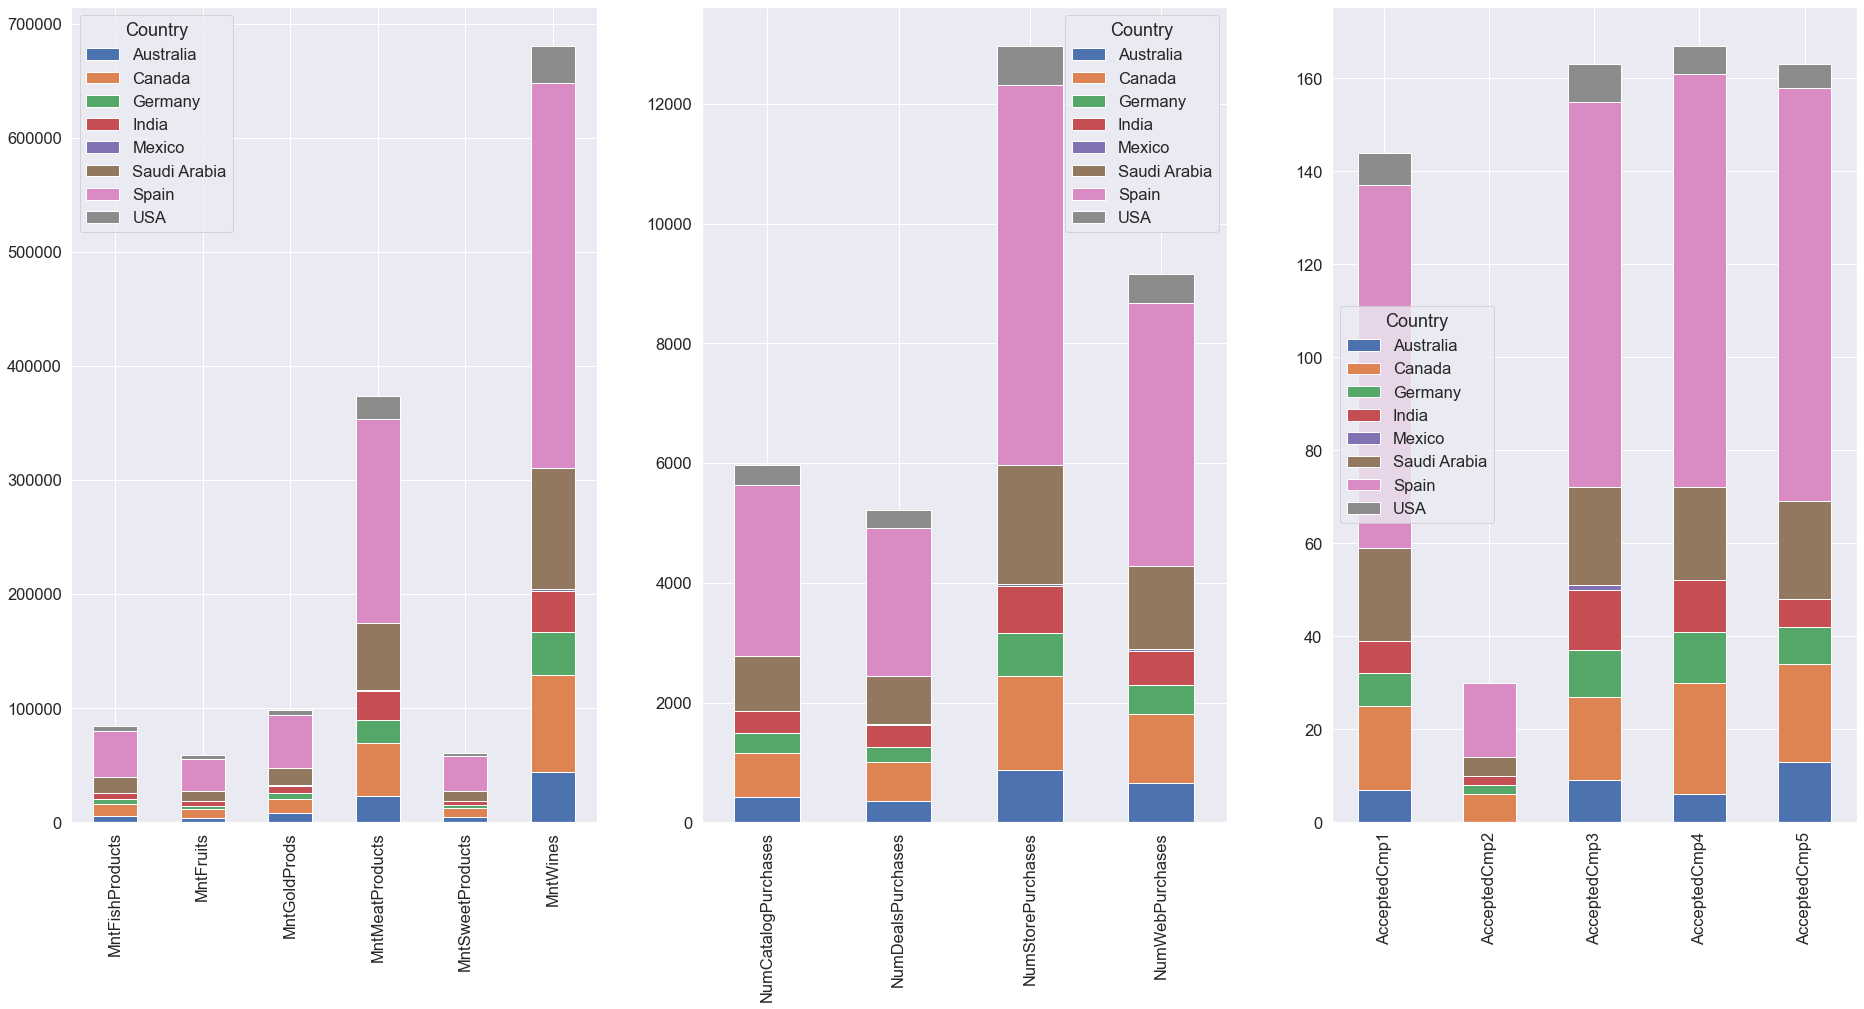

In [65]:
# explore the relationship between Country and amounts spent on different kinds of products, sales channels and their favourite campaigns

df_mnt_cty_pivot=pd.pivot_table(data=df_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Country', aggfunc=np.sum)
df_num_cty_pivot=pd.pivot_table(data=df_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Country', aggfunc=np.sum)
df_cmp_cty_pivot=pd.pivot_table(data=df_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Country', aggfunc=np.sum)

fig, ax = plt.subplots(1,3,figsize=(32,15))

df_mnt_cty_pivot.plot(kind='bar', stacked=True, ax=ax[0])
df_num_cty_pivot.plot(kind='bar', stacked=True, ax=ax[1])
df_cmp_cty_pivot.plot(kind='bar', stacked=True, ax=ax[2])

<AxesSubplot:xlabel='NumStorePurchases', ylabel='MntWines'>

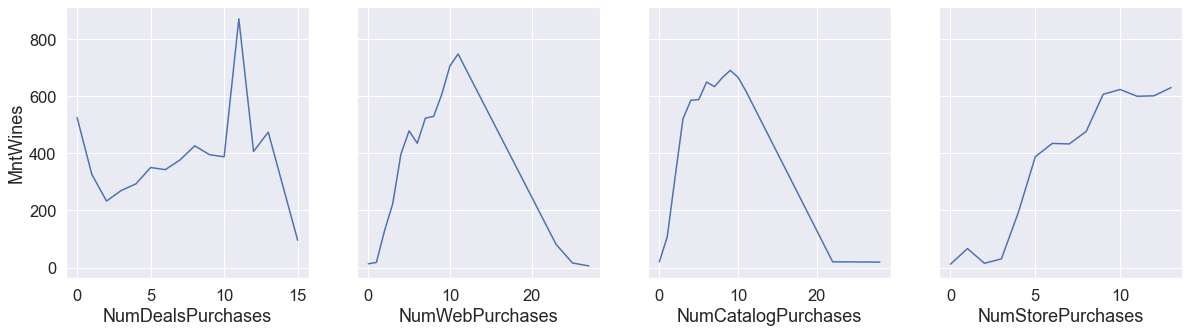

In [66]:
# explore the relationships between customers' preferred sales channels and amounts spent on wine

fig, ax = plt.subplots(1, 4, figsize=(20,5), sharey=True)

sns.lineplot(data=df_cleaned, x='NumDealsPurchases', y='MntWines', ci=None, ax=ax[0])
sns.lineplot(data=df_cleaned, x='NumWebPurchases', y='MntWines', ci=None, ax=ax[1])
sns.lineplot(data=df_cleaned, x='NumCatalogPurchases', y='MntWines', ci=None, ax=ax[2])
sns.lineplot(data=df_cleaned, x='NumStorePurchases', y='MntWines', ci=None, ax=ax[3])

<AxesSubplot:xlabel='NumStorePurchases', ylabel='MntMeatProducts'>

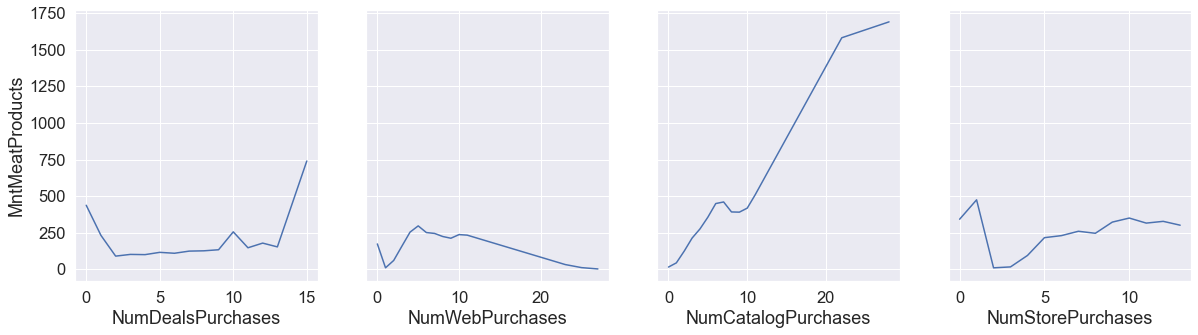

In [67]:
# explore the relationships between customers' preferred sales channels and amounts spent on meat

fig, ax = plt.subplots(1, 4, figsize=(20,5), sharey=True)

sns.lineplot(data=df_cleaned, x='NumDealsPurchases', y='MntMeatProducts', ci=None, ax=ax[0])
sns.lineplot(data=df_cleaned, x='NumWebPurchases', y='MntMeatProducts', ci=None, ax=ax[1])
sns.lineplot(data=df_cleaned, x='NumCatalogPurchases', y='MntMeatProducts', ci=None, ax=ax[2])
sns.lineplot(data=df_cleaned, x='NumStorePurchases', y='MntMeatProducts', ci=None, ax=ax[3])

<AxesSubplot:xlabel='Recency', ylabel='Count'>

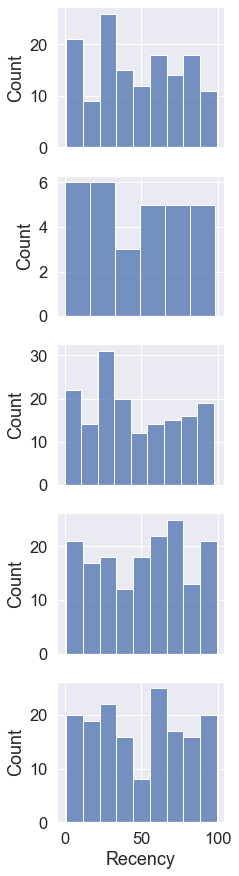

In [68]:
# Recency by accepted campaigns

cmp1=df_cleaned[df_cleaned['AcceptedCmp1']==1]
cmp2=df_cleaned[df_cleaned['AcceptedCmp2']==1]
cmp3=df_cleaned[df_cleaned['AcceptedCmp3']==1]
cmp4=df_cleaned[df_cleaned['AcceptedCmp4']==1]
cmp5=df_cleaned[df_cleaned['AcceptedCmp5']==1]

fig, ax = plt.subplots(5,1,figsize=(3,15),sharex=True)


sns.histplot(data=cmp1, x='Recency', ax=ax[0])
sns.histplot(data=cmp2, x='Recency', ax=ax[1])
sns.histplot(data=cmp3, x='Recency', ax=ax[2])
sns.histplot(data=cmp4, x='Recency', ax=ax[3])
sns.histplot(data=cmp5, x='Recency', ax=ax[4])

In [69]:
# Multivariate Exploration

/Users/yao.sisi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:xlabel='Marital_Status_Cleaned', ylabel='Income'>

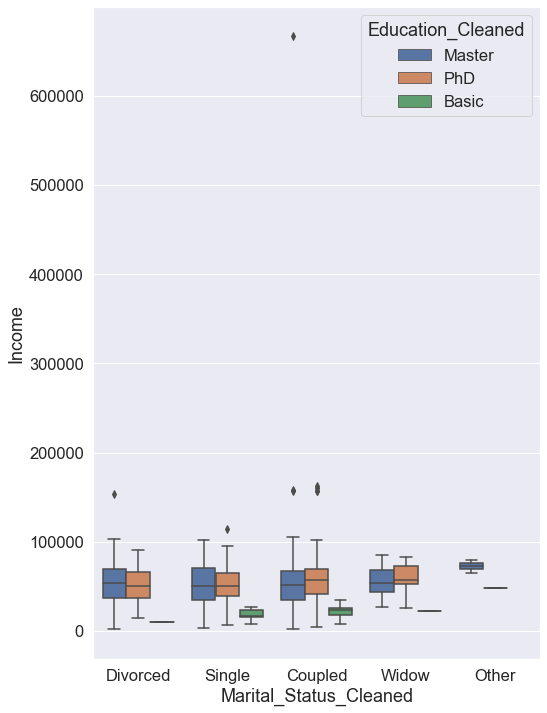

In [70]:
# Income, Education and Marital Status

df_edu_ms=df_cleaned[['Education_Cleaned', 'Marital_Status_Cleaned', 'Income']]
df_edu_ms_melted=pd.melt(df_edu_ms, value_name='Income', value_vars='Income', id_vars=['Education_Cleaned', 'Marital_Status_Cleaned'])

df_edu_ms_melted.columns

plt.figure(figsize=(8,12))
sns.boxplot(data=df_edu_ms_melted, x='Marital_Status_Cleaned', y='Income', hue='Education_Cleaned')

/Users/yao.sisi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:xlabel='Teenhome', ylabel='Income'>

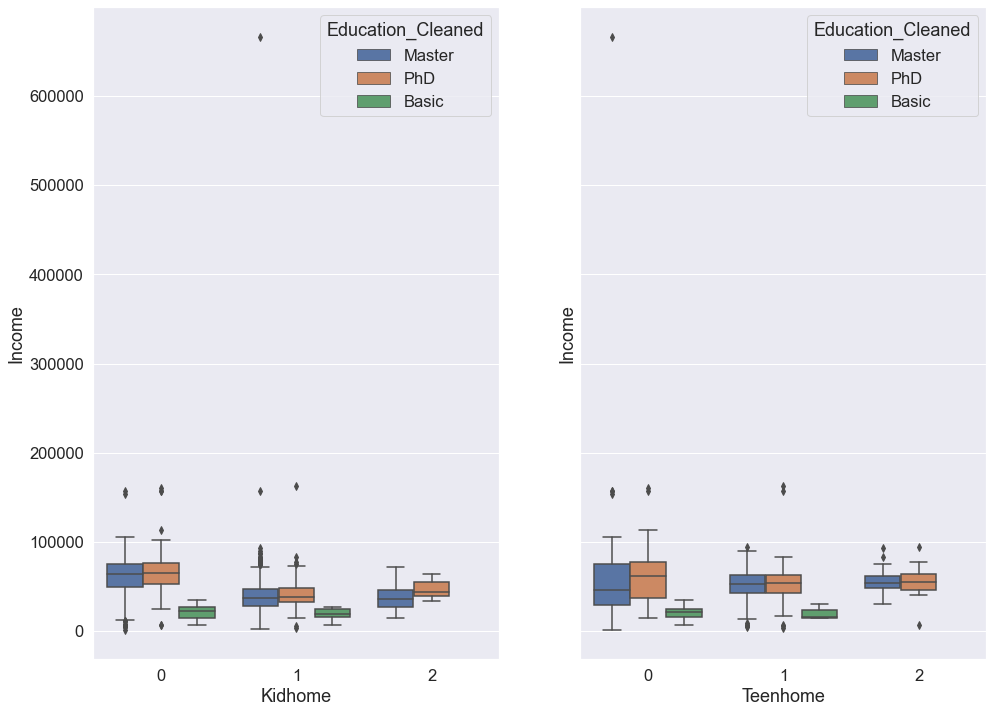

In [71]:
# Income, Education and Number of kids/teens

df_edu_kh=df_cleaned[['Education_Cleaned', 'Kidhome', 'Income']]
df_edu_kh_melted=pd.melt(df_edu_kh, value_name='Income', value_vars='Income', id_vars=['Education_Cleaned', 'Kidhome'])
df_edu_th=df_cleaned[['Education_Cleaned', 'Teenhome', 'Income']]
df_edu_th_melted=pd.melt(df_edu_th, value_name='Income', value_vars='Income', id_vars=['Education_Cleaned', 'Teenhome'])


fig, ax = plt.subplots(1,2,figsize=(16,12),sharey=True)
sns.boxplot(data=df_edu_kh_melted, x='Kidhome', y='Income', hue='Education_Cleaned', ax=ax[0])
sns.boxplot(data=df_edu_th_melted, x='Teenhome', y='Income', hue='Education_Cleaned', ax=ax[1])

In [72]:
# Conclusions of the EDA 

In [73]:
# 1 - The profile of our average customer

# Lives in Spain with Master's degree, coupled up, in their 40s-70s, earns 35-68k per year, has no or one child

In [74]:
# 2 - The most popular product types

# Our customers spend the most on wine by far, followed by meat
# Customers who spend a lot on meat likes to purchase meat via catalogue
# Customers with no kids tend to spend a lot on wine

In [75]:
# 3 - The most popular sales channels

# Customers prefer to make their purchases in store, followed by online (web)

In [76]:
# 4 - How is 'web' sales channel doing

# Even if web is relatively popular as a sales channel, it is alarming that higher website visits don't result in higher web purchases
# In fact there seems to be a slightly negative correlation between website visits and website purchases
# This needs to be looked into by the business, there could be something with our website

In [77]:
# 5 - Campaign performance

# Campaign 4 is the winning campaign, campaign 2 received poor results
# Campaign 3 seems to be very attractive to customers with basic education
# Customers with 1-2 kids or teens at home really liked campaign 3
# Customers with teens (at least one) at home really appreciated campaign 4

In [78]:
# 6 - Other thoughts

# A large portion of our customers have at least a Master's degree
# Higher education level seems to be correlated to higher income
# Which makes me wonder if we as a business is not affordable for lower income customers
# Customers with no kids seem to have higher income, which means that they might fit our targeted profile better
# As a result, it might make sense for us to figure out how to tap into their disposable income with our campaigns(that they have no kids to spend on!)